   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

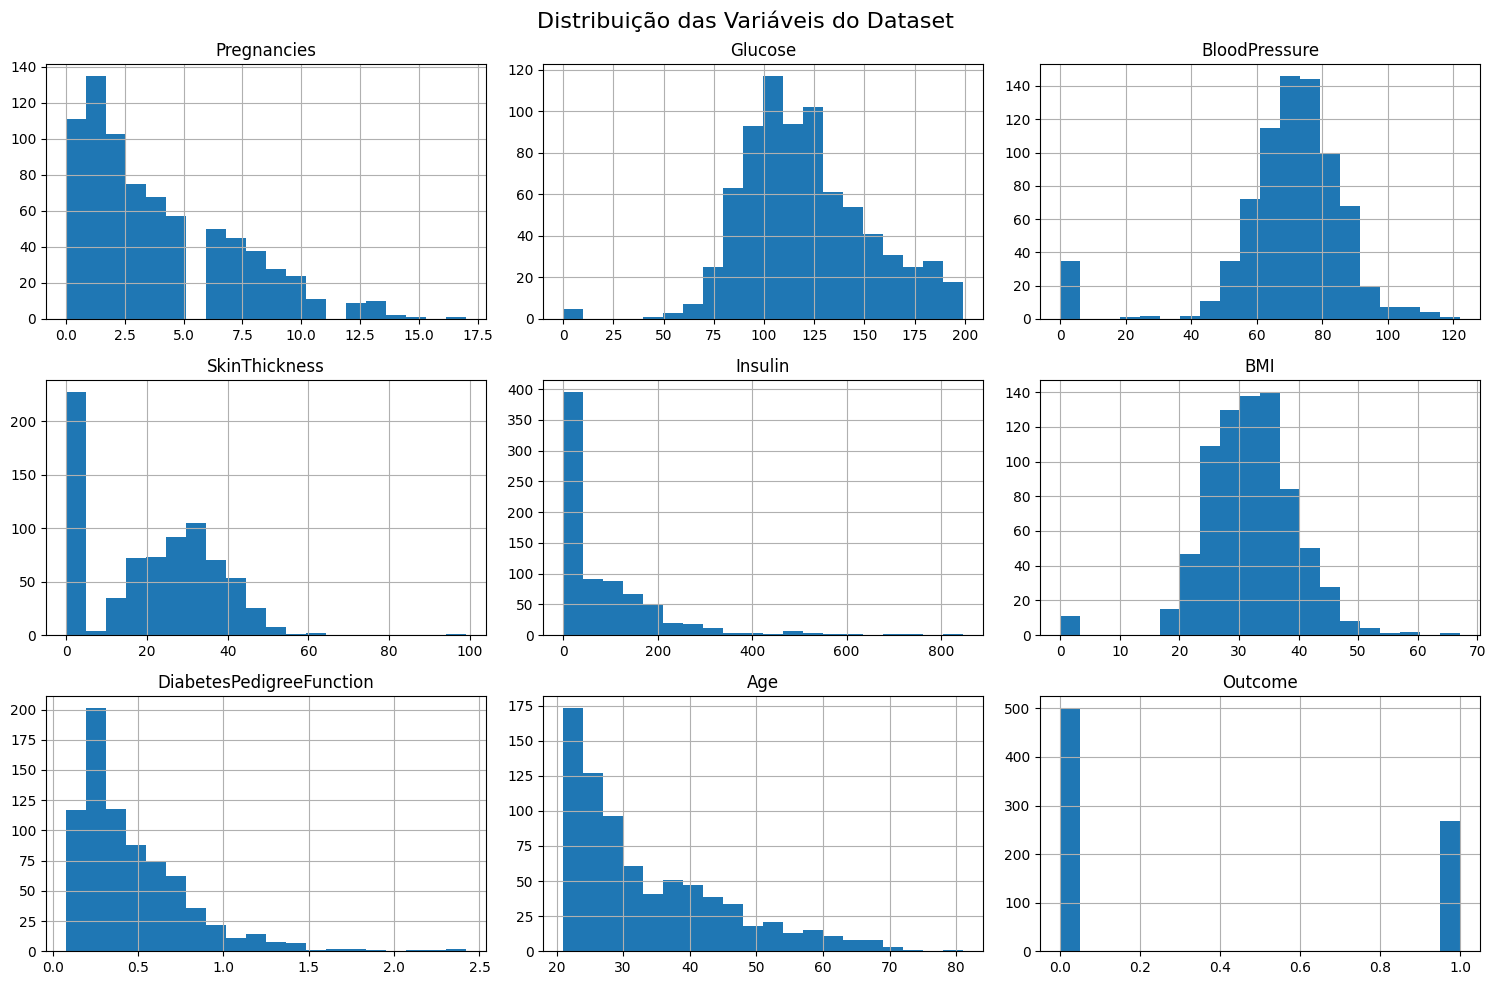

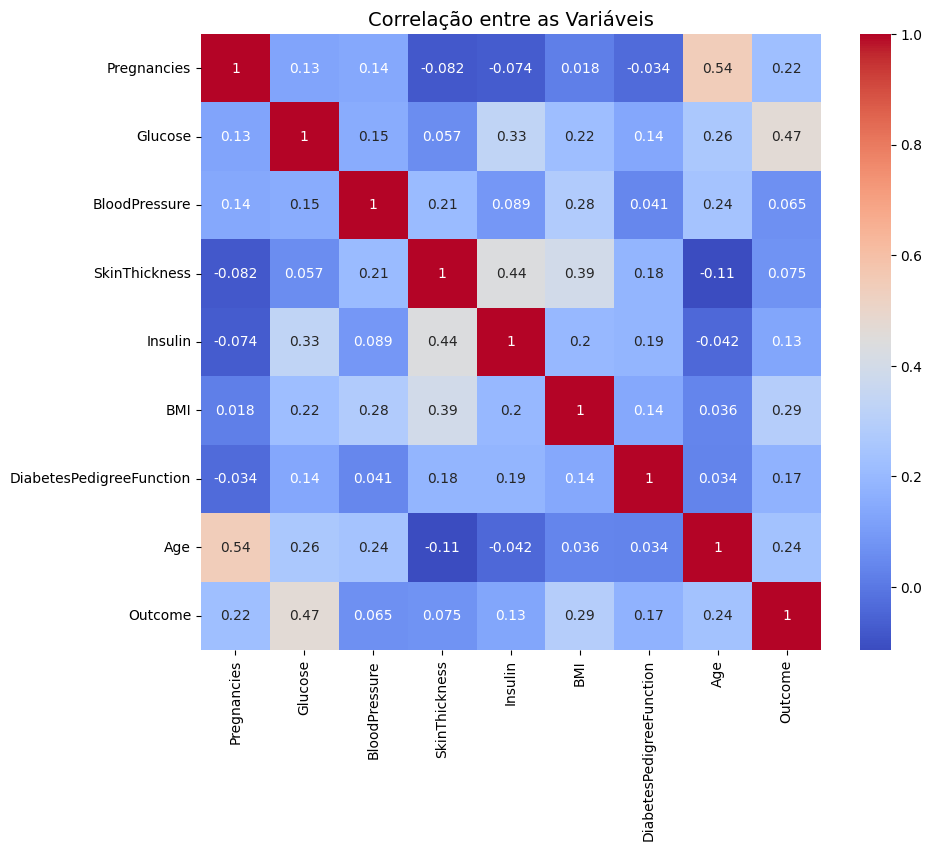

Glucose - quantidade de zeros: 5
BloodPressure - quantidade de zeros: 35
SkinThickness - quantidade de zeros: 227
Insulin - quantidade de zeros: 374
BMI - quantidade de zeros: 11
[[ 0.63994726  0.86604475 -0.03198993  0.83111367 -0.60820096  0.16724016
   0.46849198  1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186   0.1805664  -0.60820096 -0.85155088
  -0.36506078 -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 -0.46998087 -0.60820096 -1.33183808
   0.60439732 -0.10558415]
 [-0.84488505 -1.07356674 -0.5283186  -0.46998087 -0.00618459 -0.63323851
  -0.92076261 -1.04154944]
 [-1.14185152  0.50442227 -2.67907616  0.83111367  0.69537779  1.54988514
   5.4849091  -0.0204964 ]]
Outcome
0    500
1    268
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
df = pd.read_csv('diabetes.csv')

# Visualizar as primeiras linhas
print(df.head())

# Verificar informações básicas do dataset
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Criar histogramas para ver a distribuição das variáveis
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis do Dataset', fontsize=16)
plt.tight_layout()
plt.show()

# Criar mapa de calor da correlação
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Variáveis', fontsize=14)
plt.show()

# Verificando a quantidade de zeros nas colunas suspeitas
colunas_problema = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for coluna in colunas_problema:
    print(f'{coluna} - quantidade de zeros: {df[coluna].value_counts().get(0, 0)}')

# Substituindo zeros pela mediana
for coluna in colunas_problema:
    mediana = df[coluna].median()
    df[coluna] = df[coluna].replace(0, mediana)

# Separando as variáveis de entrada e o alvo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalizando os dados
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

print(X_normalizado[:5])  # Apenas para verificar
print(y.value_counts())   # Verificar proporção das classes